#Introduction

This lecture has the purpose to take a low complexity data set and develop this one in terms analisys , exploration, prediction, conclusions and next steps. Because theres always new things to do or to improve.
For who is this lecture ? For people that is starting in the world of the data science. This will give you some techniques and recomendations to apply in your project. 

Please feel free to take code, share or improve it. **Lets start.**

#The Problem - Big Five Technology Companies

Historical NASDAQ stock data of tech companies dubbed: 'Big Five' until August 23rd, 2019. The companies are: Apple, Google, Amazon, Facebook, and Microsoft.

The Nasdaq Stock Market, is an American stock exchange. It is the second-largest stock exchange in the world by market capitalization, behind only the New York Stock Exchange located in the same city.

| stock ticker | name                                                               |
|--------------|--------------------------------------------------------------------|
| ^IXIC        | Nasdaq Composite                                                   |
| AAPL         | Apple, inc                                                         |
| GOOGL        | Google Inc (Aug 19, 2004–Oct 1, 2015), Alphabet Inc.(Oct 2, 2015–) |
| AMZN         | Amazon.com, Inc.                                                   |
| MSFT         | Microsoft Corporation                                              |
| FB           | Facebook, Inc.                                                     |

Through this dataset we will predict how these 5 companies will close the stock price at NASDAQ.

During the process we will first understand this data set, we will do a preprocessing of the data, extraction of the characteristics, the application of different models to perform regression and finally, we will analyze the results of the prediction.

This is probably not the best way to attack the stock exchange problem, because we are not considering other variables outside and offcourse we are focusing in the Big Five Technology Companies.

#Dependencies

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import fastai

from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_datareader import data
from fastai.basics import *
from sklearn import metrics


from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Configuration Variables

In [0]:
vRandomSeed = 11
vTest_Size = 0.3
plt.rcParams["figure.figsize"] = [16,9]

#Get Knowing the Data


**Loading the Data**

In [0]:
vData = pd.read_csv('https://raw.githubusercontent.com/fgomezvalverde/MachineLearningCourse/master/big_five_stocks.csv')

**Shape of the Data**

In [0]:
vData.shape

(41660, 7)

**Watching the Head of the Data**

In [0]:
vData.head()

,Unnamed: 0,name,open,close,high,low,volume
0,1971-02-05,^IXIC,100.00,100.00,100.00,100.00,0.0
1,1971-02-08,^IXIC,100.84,100.84,100.84,100.84,0.0
2,1971-02-09,^IXIC,100.76,100.76,100.76,100.76,0.0
3,1971-02-10,^IXIC,100.69,100.69,100.69,100.69,0.0
4,1971-02-11,^IXIC,101.45,101.45,101.45,101.45,0.0


**Lets change the date column name that is wrong**

In [0]:
vData.columns = ['date', 'name', 'open', 'close', 'high', 'low', 'volume']

**Lets see what are the features descriptions:**


| Column | Description                   |
|--------|-------------------------------|
| date   | Date                  |
| name   | Stock ticker                  |
| open   | Stock price at NASDAQ opening |
| close  | Stock price at NASDAQ closing |
| high   | Highest daily price           |
| low    | Lowest daily price            |
| volume | The number of shares traded   |

In *name* column, we find the Nasdaq Composite index (^ IXIC)

The Nasdaq Composite index is a United States stock index that includes all securities (both domestic and foreign) that are listed on the Nasdaq market, a total of more than 5000 companies.

The index was developed with a base level of 100 as of February 5, 1971. Companies are weighted by the capitalization criterion. The high weighting of technological values within the Nasdaq market has made this index very popular, but it is a very volatile and speculative index.

**Because ^IXIC is a very volatile and speculative index we are going to remove it to just work with Apple, Microsoft, Amazon, Facebook and Google**

In [0]:
vData = vData[vData.name != '^IXIC']

**Lets see our data types**

In [0]:
vData.info()
vData.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29408 entries, 2485 to 41659
Data columns (total 7 columns):
date      29408 non-null object
name      29408 non-null object
open      29408 non-null float64
close     29408 non-null float64
high      29408 non-null float64
low       29408 non-null float64
volume    29408 non-null float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


date       object
name       object
open      float64
close     float64
high      float64
low       float64
volume    float64
dtype: object

**Changing Name column to Category Type and Date column to Datetime Type**

In [0]:
vData.name = vData.name.astype('category')
vData.date = vData.date.astype('datetime64[ns]')

#Exploratory Data Analysis


**Let´s see how each company grow over the time**


##Amazon

(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.]),
 <a list of 7 Text xticklabel objects>)

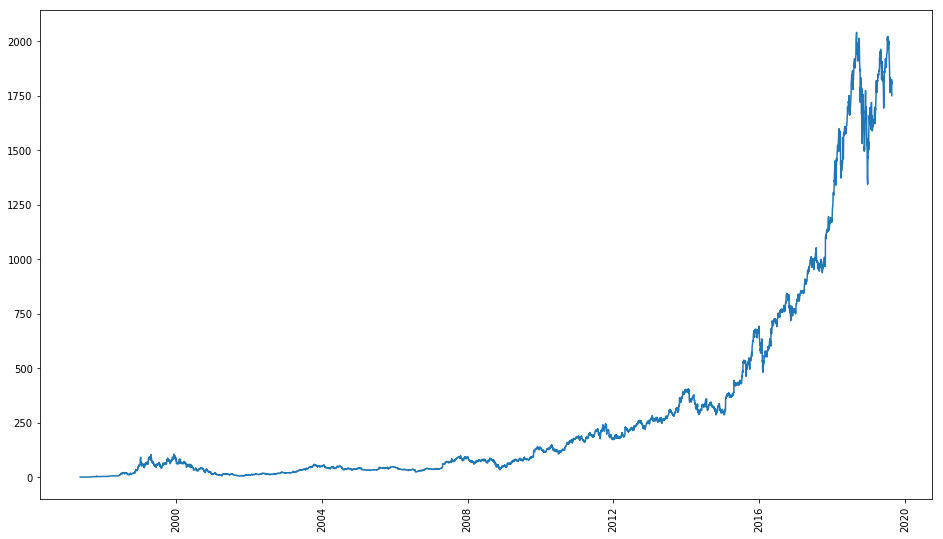

In [0]:
vData_Amazon = vData[vData['name'] == 'AMZN'][['close','date']]

vData_Amazon = vData_Amazon.sort_values('date', ascending=True)
plt.plot(vData_Amazon['date'], vData_Amazon['close'])
plt.xticks(rotation='vertical')


##Facebook

(array([734503., 734869., 735234., 735599., 735964., 736330., 736695., 737060., 737425.]),
 <a list of 9 Text xticklabel objects>)

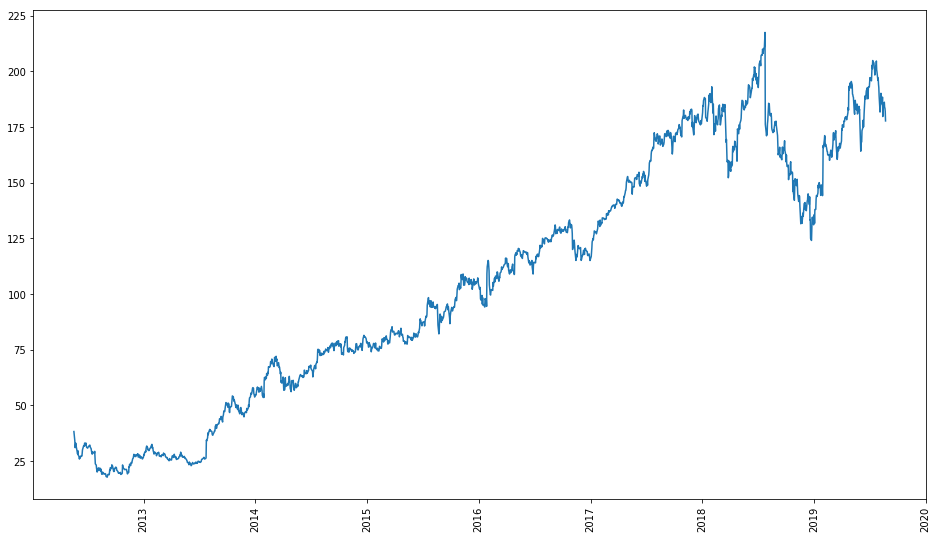

In [0]:
vData_FB = vData[vData['name'] == 'FB'][['close','date']]

vData_FB = vData_FB.sort_values('date', ascending=True)
plt.plot(vData_FB['date'], vData_FB['close'])
plt.xticks(rotation='vertical')

##Google

(array([730851., 731581., 732312., 733042., 733773., 734503., 735234., 735964., 736695., 737425.]),
 <a list of 10 Text xticklabel objects>)

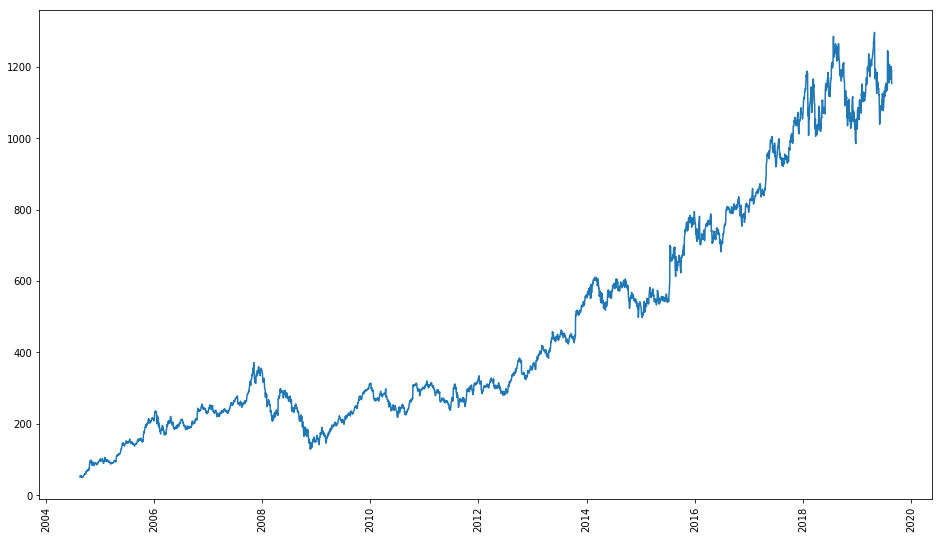

In [0]:
vData_Google = vData[vData['name'] == 'GOOGL'][['close','date']]

vData_Google = vData_Google.sort_values('date', ascending=True)
plt.plot(vData_Google['date'], vData_Google['close'])
plt.xticks(rotation='vertical')

##Microsoft

(array([724276., 725737., 727198., 728659., 730120., 731581., 733042., 734503., 735964., 737425., 738886.]),
 <a list of 11 Text xticklabel objects>)

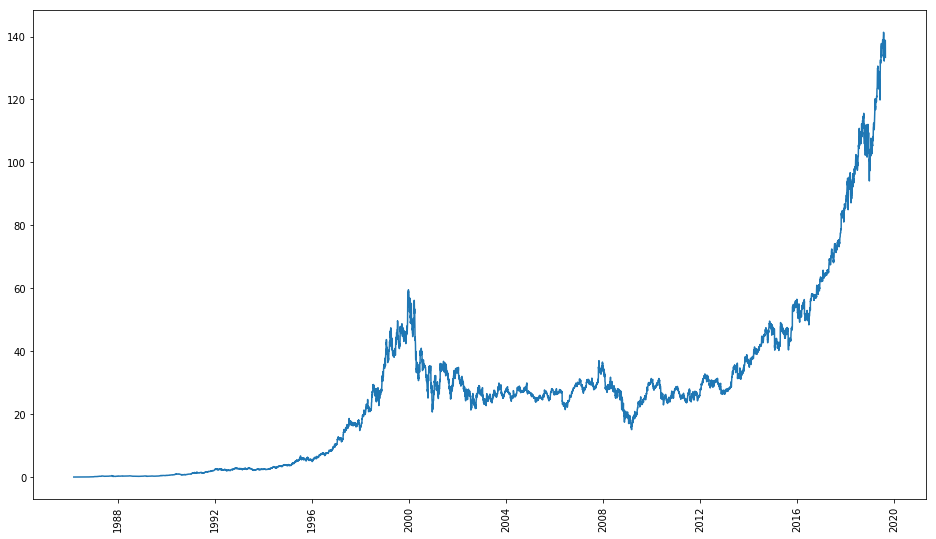

In [0]:
vData_Microsoft = vData[vData['name'] == 'MSFT'][['close','date']]

vData_Microsoft = vData_Microsoft.sort_values('date', ascending=True)
plt.plot(vData_Microsoft['date'], vData_Microsoft['close'])
plt.xticks(rotation='vertical')

##Apple

(array([720989., 722815., 724642., 726468., 728294., 730120., 731947., 733773., 735599., 737425., 739252.]),
 <a list of 11 Text xticklabel objects>)

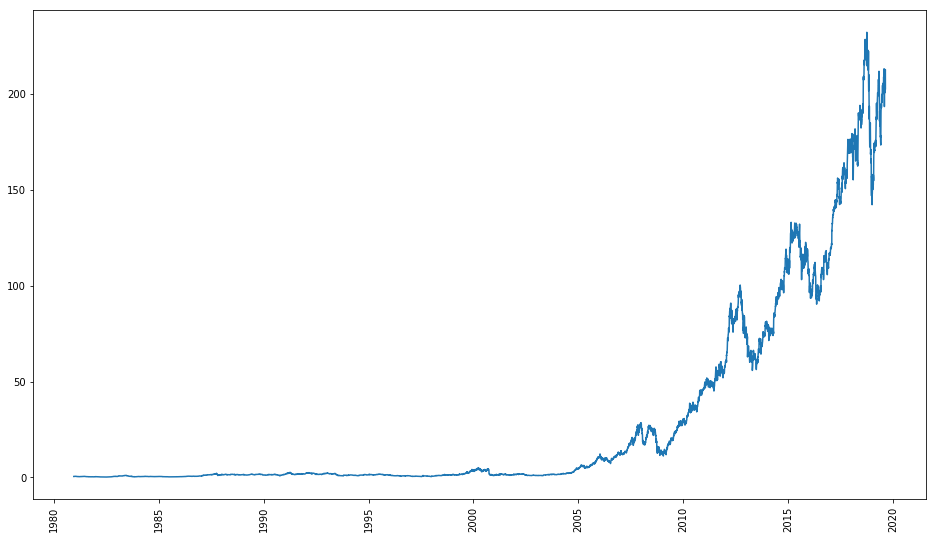

In [0]:
vData_Apple = vData[vData['name'] == 'AAPL'][['close','date']]

vData_Apple = vData_Apple.sort_values('date', ascending=True)
plt.plot(vData_Apple['date'], vData_Apple['close'])
plt.xticks(rotation='vertical')

Is interesting that most of these companies have a continious growing from 2010 to the present.

#Preprocessing the data

In [0]:
(vData.volume == 0).values.sum()

236

**Theres lots of zeros values in the data set, let check that a bit more**

In [0]:
vData[vData.volume == 0].sort_values('date', ascending=True)

,date,name,open,close,high,low,volume
12022,1995-04-06,AAPL,1.33,1.31,1.34,1.28,0.0
12024,1995-04-06,MSFT,4.42,4.38,4.43,4.34,0.0
12025,1995-04-07,MSFT,4.39,4.35,4.42,4.34,0.0
12026,1995-04-07,AAPL,1.32,1.31,1.33,1.29,0.0
12029,1995-04-10,AAPL,1.32,1.31,1.32,1.29,0.0
12030,1995-04-10,MSFT,4.34,4.43,4.45,4.32,0.0
12031,1995-04-11,MSFT,4.48,4.51,4.59,4.45,0.0
12032,1995-04-11,AAPL,1.31,1.35,1.35,1.31,0.0
12034,1995-04-12,MSFT,4.51,4.48,4.58,4.42,0.0
12036,1995-04-12,AAPL,1.37,1.39,1.42,1.34,0.0


**We thought there was two possible  options about these zeros in volume:**
1.   The dataSet got wrong these values, but after some research from other source ,same dates have zero values as well, so no this one. 
2.   Theres was actually not moves on those days, looks like this is the right one. Soo this data, zero values are actually real numbers that would not hinder our results.


So we will leave it this way.


**Checking Null Values**

In [0]:
vData.isnull().values.any()

False

**Perfect, we dont have null values in the data set. Now let´s see a small description of the data to see if we should apply a standarization or normalization**

In [0]:
vData.describe()

,open,close,high,low,volume
count,29408.000000,29408.000000,29408.000000,29408.000000,2.940800e+04
mean,142.374676,142.347062,143.799331,140.803971,1.693721e+07
std,289.372296,289.249853,291.946333,286.340991,2.396547e+07
min,0.090000,0.090000,0.090000,0.090000,0.000000e+00
25%,2.390000,2.390000,2.440000,2.350000,1.888660e+06
50%,30.870000,30.885000,31.250000,30.520000,6.144000e+06
75%,128.465000,128.690000,129.717500,127.400000,2.439436e+07
max,2038.110000,2039.510000,2050.500000,2013.000000,5.910786e+08


**Volume is a candidate to apply a standarization or normalization.
The mean and max are quite far from each other in comparisson from min and mean. So we would suggets apply standarization.**

In [0]:
vData[['volume']] = StandardScaler().fit_transform(vData[['volume']])
vData.describe()

,open,close,high,low,volume
count,29408.000000,29408.000000,29408.000000,29408.000000,2.940800e+04
mean,142.374676,142.347062,143.799331,140.803971,5.097643e-16
std,289.372296,289.249853,291.946333,286.340991,1.000017e+00
min,0.090000,0.090000,0.090000,0.090000,-7.067457e-01
25%,2.390000,2.390000,2.440000,2.350000,-6.279369e-01
50%,30.870000,30.885000,31.250000,30.520000,-4.503726e-01
75%,128.465000,128.690000,129.717500,127.400000,3.111677e-01
max,2038.110000,2039.510000,2050.500000,2013.000000,2.395743e+01


**Changing Name Category to numbers**

In [0]:
vData['name'] = vData['name'].astype(str)
vData['name'] = vData['name'].replace({'FB': 0, 'AMZN' :1,'GOOGL':2,'MSFT':3,'AAPL':4})
vData.head()

,date,name,open,close,high,low,volume
2485,1980-12-12,4,0.51,0.51,0.52,0.51,-0.619373
2488,1980-12-15,4,0.49,0.49,0.49,0.49,-0.673981
2490,1980-12-16,4,0.45,0.45,0.45,0.45,-0.687050
2492,1980-12-17,4,0.46,0.46,0.46,0.46,-0.690643
2494,1980-12-18,4,0.48,0.48,0.48,0.48,-0.693063


**Lets do some Date Feature engineering**

To make this easier we will use fast.ai library, this is a collection of supplementary wrappers for a host of popular machine learning libraries.

add_datepart is a function that exists in fast.ai which leverages Pandas under the hood in order to automate some simple date-related feature engineering.

In [0]:
def add_datepart(df, fldname, drop=False):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    if drop: df.drop(fldname, axis=1, inplace=True)
      
add_datepart(vData, 'date')


In [0]:
vData.head(5)

,date,name,open,close,high,low,volume,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start
2485,1980-12-12,4,0.51,0.51,0.52,0.51,-0.619373,1980,12,50,12,4,347,False,False,False,False
2488,1980-12-15,4,0.49,0.49,0.49,0.49,-0.673981,1980,12,51,15,0,350,False,False,False,False
2490,1980-12-16,4,0.45,0.45,0.45,0.45,-0.687050,1980,12,51,16,1,351,False,False,False,False
2492,1980-12-17,4,0.46,0.46,0.46,0.46,-0.690643,1980,12,51,17,2,352,False,False,False,False
2494,1980-12-18,4,0.48,0.48,0.48,0.48,-0.693063,1980,12,51,18,3,353,False,False,False,False


### Correlational Mapping

The statistical relationship between two variables is referred to as their correlation. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable's value increases, the other variables' values decrease.

During the course we learned that if you have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

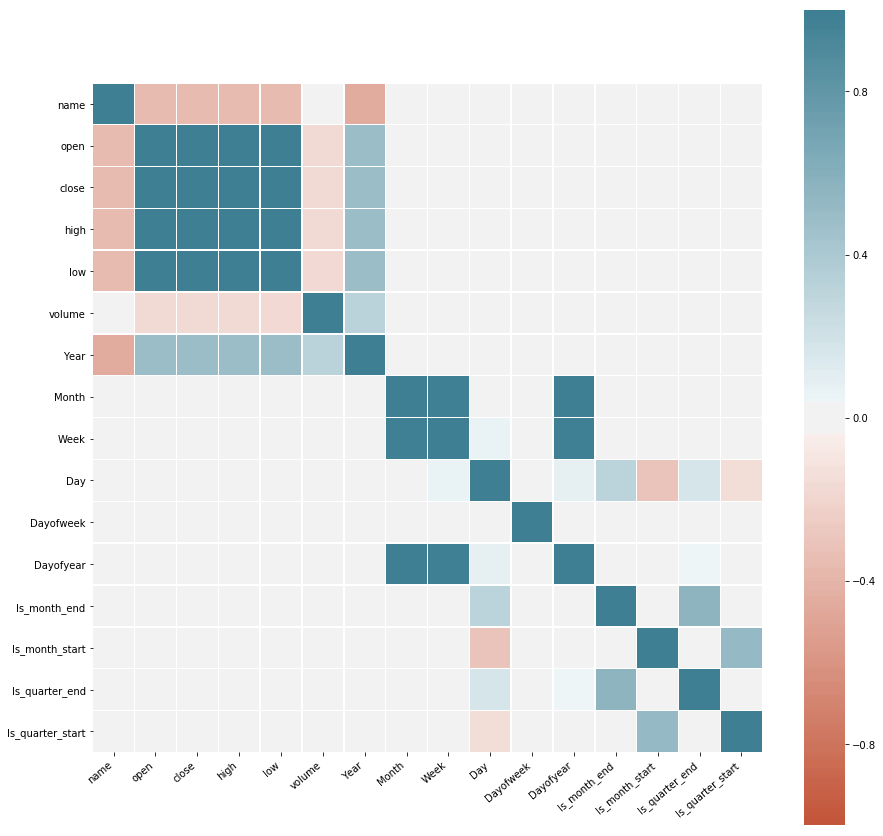

In [0]:
corr = vData.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=False,
    linewidth = 0.5,
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,
    horizontalalignment='right',
);

Great! Green means positive, red means negative. The stronger the color, the larger the correlation magnitude.

Well, for now we can see that the columns added during Date Feature engineering are not as important as we tought, also *volumn* is painted as a salmon color, so we will only use for the problems.



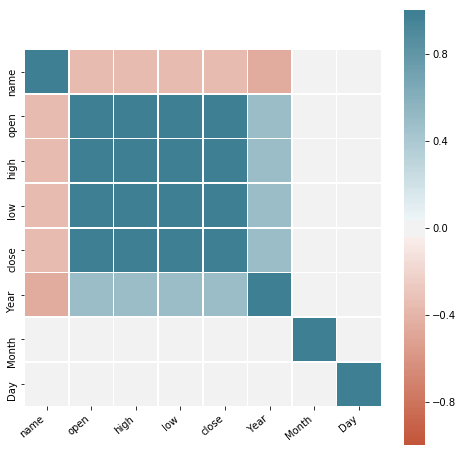

In [0]:
vCorr_Data = vData[['name', 'open', 'high','low','close', 'Year', 'Month', 'Day']]
corr = vCorr_Data.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=False,
    linewidth = 0.5,
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,
    horizontalalignment='right',
);

We decided that we will select the following features, *Year, Month* and *Day* are selected mostly because we want to see the results based on a date perspective:

*   name
*   open
*   high
*   low
*   Year
*   Month
*   Day
*   close





**We will use the Close column as our Y value or value to predict.
Soo lets separate the X values and Y values in the Data Set.**

In [0]:
vX_Data = vData[["name", "open", "high","low", 'Year', 'Month', 'Day']]
vY_Data = vData[['close']]

vX_Data.head(5)

,name,open,high,low,Year,Month,Day
2485,4,0.51,0.52,0.51,1980,12,12
2488,4,0.49,0.49,0.49,1980,12,15
2490,4,0.45,0.45,0.45,1980,12,16
2492,4,0.46,0.46,0.46,1980,12,17
2494,4,0.48,0.48,0.48,1980,12,18


**Lets split the data to training and test using sklearn**

In [0]:
vX_Data_Train, vX_Data_Test, vY_Data_Train, vY_Data_Test = train_test_split(vX_Data,vY_Data, random_state=vRandomSeed,test_size=vTest_Size)

#Testing models and Tunning

In [0]:
def FormatDate(vDataFrame):
  vDf = pd.DataFrame()
  vDf.insert(0, "date", vDataFrame.Year.astype('str') + '-'+vDataFrame.Month.astype('str')+'-'+vDataFrame.Day.astype('str'), True)
  vDf.date = vDf.date.astype('datetime64[ns]')
  return vDf

##Linear Regression

Regression is a technique used to model and analyze the relationships between variables and often times how they contribute and are related to producing a particular outcome together. A linear regression refers to a regression model that is completely made up of linear variables. Beginning with the simple case, Single Variable Linear Regression is a technique used to model the relationship between a single input independent variable (feature variable) and an output dependent variable using a linear model i.e a line

Taken from: https://towardsdatascience.com/5-types-of-regression-and-their-properties-c5e1fa12d55e

In [0]:
linearRegressor = LinearRegression()
linearRegressor.fit(vX_Data_Train, vY_Data_Train)

yPredictionTrain = linearRegressor.predict(vX_Data_Train)
yPredictionTest = linearRegressor.predict(vX_Data_Test)

#Score
vLR_Train_score = linearRegressor.score(vX_Data_Train, vY_Data_Train) #gives a score between 0 and 1, where 1 indicates that the algorithm learned perfectly and 0 that did not learn anything.
vLR_Test_score = linearRegressor.score(vX_Data_Test, vY_Data_Test)

#RMSE
vRMSE_LR_Train = sqrt(metrics.mean_squared_error(yPredictionTrain, vY_Data_Train))
vRMSE_LR_Test = sqrt(metrics.mean_squared_error(yPredictionTest, vY_Data_Test))

print('Train score', vLR_Train_score)
print('Test score', vLR_Test_score)

print('RMSE Training Set:', vRMSE_LR_Train)  
print('RMSE Test Set:', vRMSE_LR_Test)

Train score 0.9999608580186798
Test score 0.9999511871182444
RMSE Training Set: 1.822460286108194
RMSE Test Set: 1.9868915330872494


**Ploting the Expected vs Prediction**

In [0]:
#setting variables: 'prediction', 'real' and 'date for TEST
vDataFrameLinearRegression_Test = vX_Data_Test.copy()
vDataFrameLinearRegression_Test["prediction"] = yPredictionTest
vDataFrameLinearRegression_Test["real"] = vY_Data_Test
vDataFrameLinearRegression_Test.append(FormatDate(vDataFrameLinearRegression_Test),ignore_index=True,sort=True)
vDataFrameLinearRegression_Test["date"] = FormatDate(vDataFrameLinearRegression_Test)

#setting variables: 'prediction', 'real' and 'date for TRAIN
vDataFrameLinearRegression_Train = vX_Data_Train.copy()
vDataFrameLinearRegression_Train["prediction"] = yPredictionTrain
vDataFrameLinearRegression_Train["real"] = vY_Data_Train
vDataFrameLinearRegression_Train.append(FormatDate(vDataFrameLinearRegression_Train),ignore_index=True,sort=True)
vDataFrameLinearRegression_Train["date"] = FormatDate(vDataFrameLinearRegression_Train)


**Let´s see Facebook prediction vs expected**

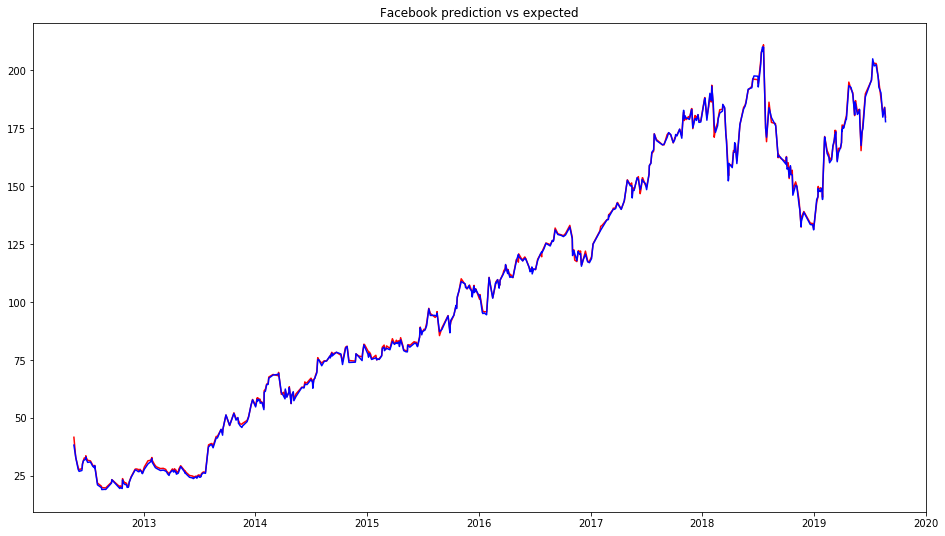

In [0]:
#lets get the data for Name 0
#{'FB': 0, 'AMZN' :1,'GOOGL':2,'MSFT':3,'AAPL':4}
vDataPlt_FB_Test = vDataFrameLinearRegression_Test[vDataFrameLinearRegression_Test['name'] == 0][['date','prediction','real']]
vDataPlt_FB_Test = vDataPlt_FB_Test.sort_values('date', ascending=True)

vDataPlt_FB_Train = vDataFrameLinearRegression_Train[vDataFrameLinearRegression_Train['name'] == 0][['date','prediction','real']]
vDataPlt_FB_Train = vDataPlt_FB_Train.sort_values('date', ascending=True)

vRMSE_FB_Train = sqrt(metrics.mean_squared_error(vDataPlt_FB_Train["prediction"], vDataPlt_FB_Train["real"]))
vRMSE_FB_Test = sqrt(metrics.mean_squared_error(vDataPlt_FB_Test["prediction"], vDataPlt_FB_Test["real"]))

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(vDataPlt_FB_Test["date"], vDataPlt_FB_Test["prediction"], color='red') 
plt.plot(vDataPlt_FB_Test["date"], vDataPlt_FB_Test["real"], color='blue') 
plt.title('Facebook prediction vs expected')

plt.show() 

**It´s looks like there is no a big diference in the between expected and predicted. Let focus in the last 30 rows, maybe it will be easier to see the diference.**

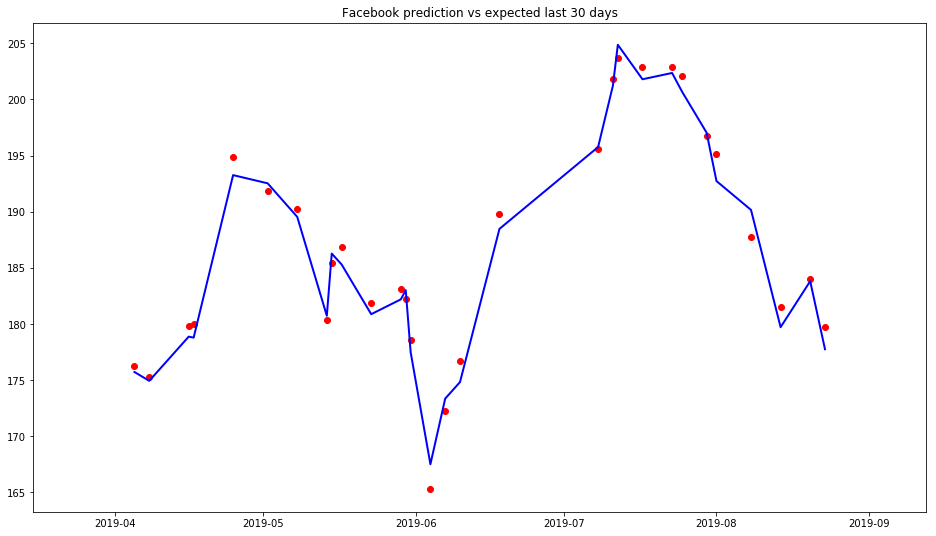

In [0]:
plt.scatter(vDataPlt_FB_Test["date"].tail(30), vDataPlt_FB_Test["prediction"].tail(30), color='red', linewidth=1) 
plt.plot(vDataPlt_FB_Test["date"].tail(30), vDataPlt_FB_Test["real"].tail(30), color='blue', linewidth=2) 
plt.title('Facebook prediction vs expected last 30 days')


plt.show() 

It doesnt looks bad at all.

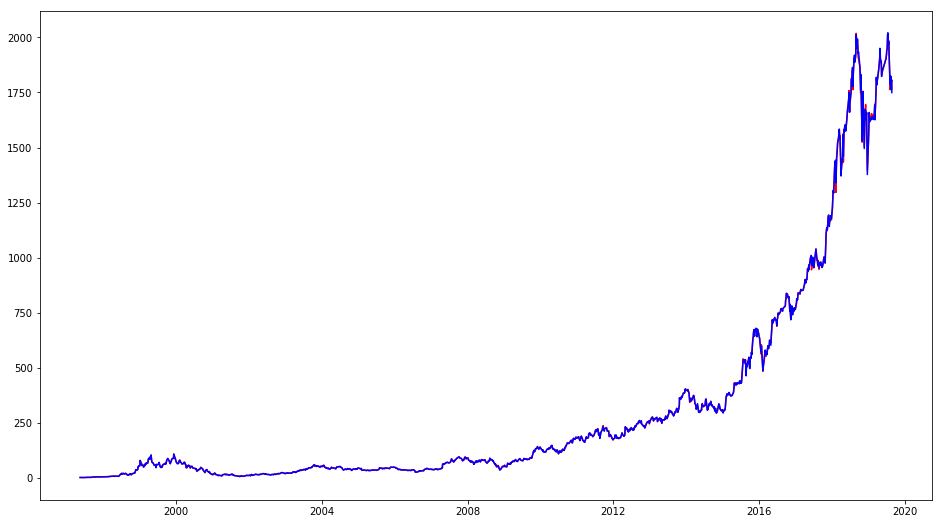

In [0]:
#AMZN
vDataPlt_AMZN_Test = vDataFrameLinearRegression_Test[vDataFrameLinearRegression_Test['name'] == 1][['date','prediction','real']]
vDataPlt_AMZN_Test = vDataPlt_AMZN_Test.sort_values('date', ascending=True)

vDataPlt_AMZN_Train = vDataFrameLinearRegression_Train[vDataFrameLinearRegression_Train['name'] == 1][['date','prediction','real']]
vDataPlt_AMZN_Train = vDataPlt_AMZN_Train.sort_values('date', ascending=True)

vRMSE_AMZN_Train = sqrt(metrics.mean_squared_error(vDataPlt_AMZN_Train["prediction"], vDataPlt_AMZN_Train["real"]))
vRMSE_AMZN_Test = sqrt(metrics.mean_squared_error(vDataPlt_AMZN_Test["prediction"], vDataPlt_AMZN_Test["real"]))

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(vDataPlt_AMZN_Test["date"], vDataPlt_AMZN_Test["prediction"], color='red') 
plt.plot(vDataPlt_AMZN_Test["date"], vDataPlt_AMZN_Test["real"], color='blue') 

plt.show() 

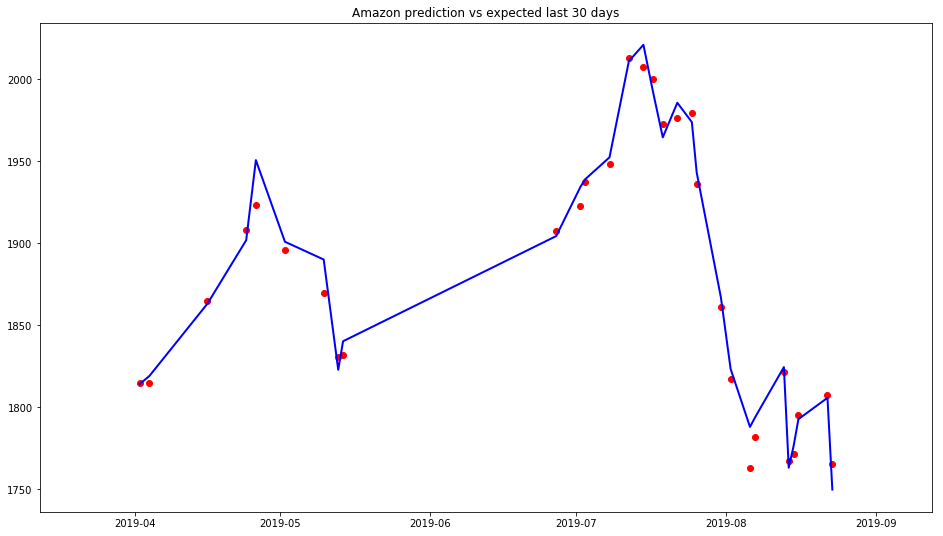

In [0]:
plt.scatter(vDataPlt_AMZN_Test["date"].tail(30), vDataPlt_AMZN_Test["prediction"].tail(30), color='red') 
plt.plot(vDataPlt_AMZN_Test["date"].tail(30), vDataPlt_AMZN_Test["real"].tail(30), color='blue', linewidth=2) 
plt.title('Amazon prediction vs expected last 30 days') 

plt.show()

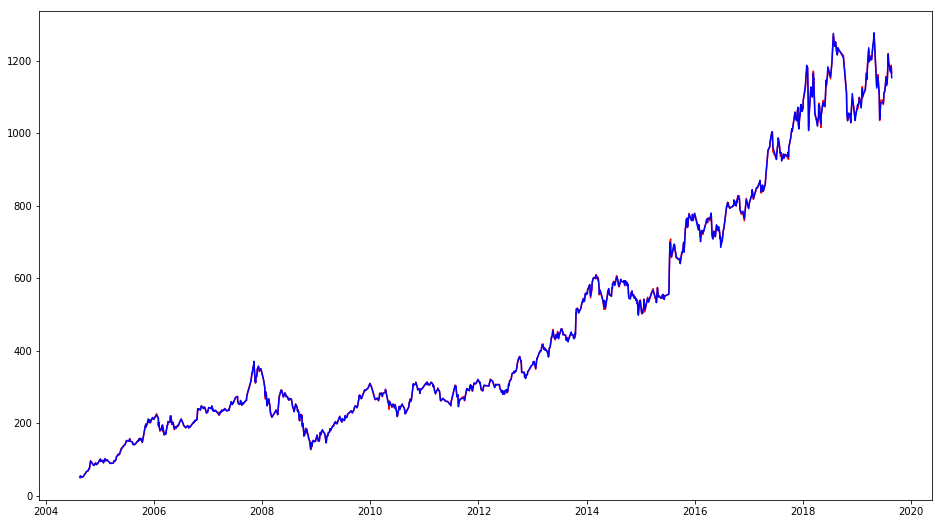

In [0]:
#GOOGL
vDataPlt_GOOGL_Test = vDataFrameLinearRegression_Test[vDataFrameLinearRegression_Test['name'] == 2][['date','prediction','real']]
vDataPlt_GOOGL_Test = vDataPlt_GOOGL_Test.sort_values('date', ascending=True)

vDataPlt_GOOGL_Train = vDataFrameLinearRegression_Train[vDataFrameLinearRegression_Train['name'] == 2][['date','prediction','real']]
vDataPlt_GOOGL_Train = vDataPlt_GOOGL_Train.sort_values('date', ascending=True)

vRMSE_GOOGL_Train = sqrt(metrics.mean_squared_error(vDataPlt_GOOGL_Train["prediction"], vDataPlt_GOOGL_Train["real"]))
vRMSE_GOOGL_Test = sqrt(metrics.mean_squared_error(vDataPlt_GOOGL_Test["prediction"], vDataPlt_GOOGL_Test["real"]))

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(vDataPlt_GOOGL_Test["date"], vDataPlt_GOOGL_Test["prediction"], color='red') 
plt.plot(vDataPlt_GOOGL_Test["date"], vDataPlt_GOOGL_Test["real"], color='blue') 

plt.show()

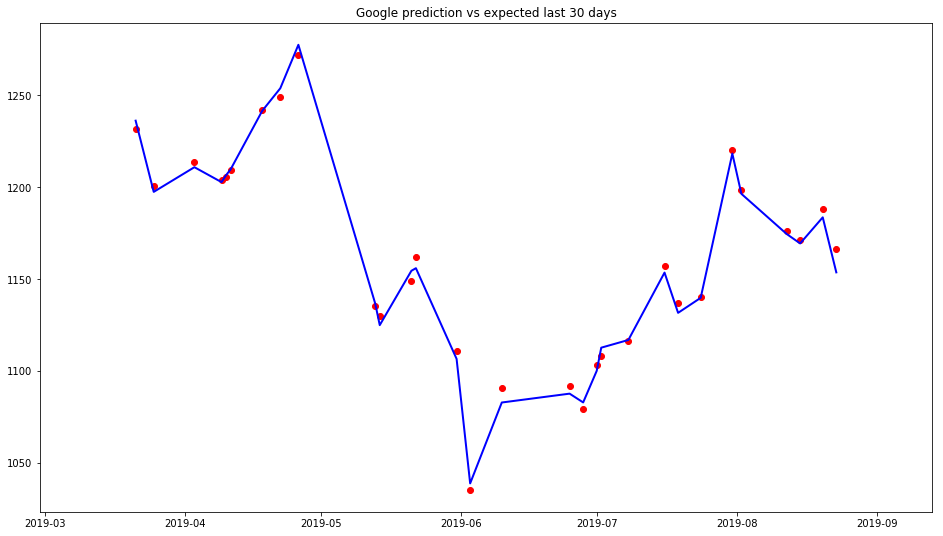

In [0]:
plt.scatter(vDataPlt_GOOGL_Test["date"].tail(30), vDataPlt_GOOGL_Test["prediction"].tail(30), color='red') 
plt.plot(vDataPlt_GOOGL_Test["date"].tail(30), vDataPlt_GOOGL_Test["real"].tail(30), color='blue', linewidth=2) 
plt.title('Google prediction vs expected last 30 days')
plt.show()

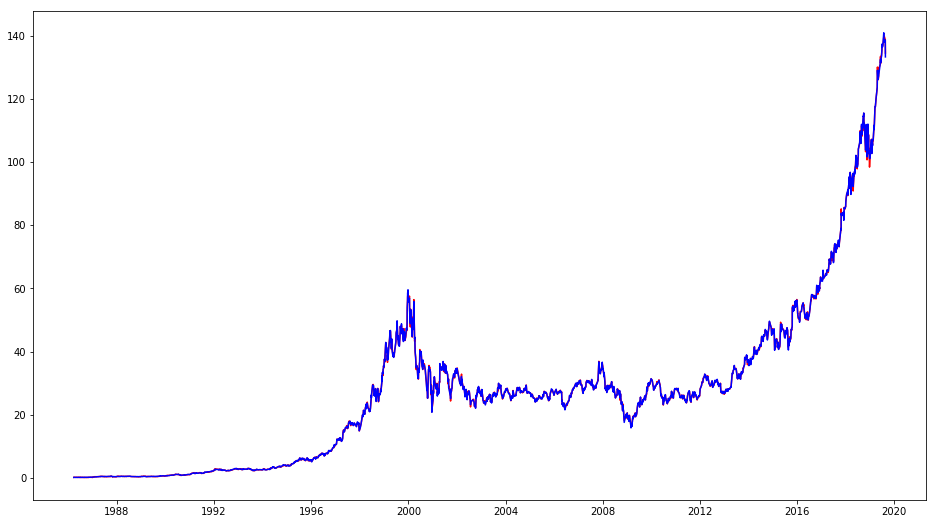

In [0]:

#AAPL
vDataPlt_AAPL_Test = vDataFrameLinearRegression_Test[vDataFrameLinearRegression_Test['name'] == 3][['date','prediction','real']]
vDataPlt_AAPL_Test = vDataPlt_AAPL_Test.sort_values('date', ascending=True)

vDataPlt_AAPL_Train = vDataFrameLinearRegression_Train[vDataFrameLinearRegression_Train['name'] == 3][['date','prediction','real']]
vDataPlt_AAPL_Train = vDataPlt_AAPL_Train.sort_values('date', ascending=True)

vRMSE_AAPL_Train = sqrt(metrics.mean_squared_error(vDataPlt_AAPL_Train["prediction"], vDataPlt_AAPL_Train["real"]))
vRMSE_AAPL_Test = sqrt(metrics.mean_squared_error(vDataPlt_AAPL_Test["prediction"], vDataPlt_AAPL_Test["real"]))

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(vDataPlt_AAPL_Test["date"], vDataPlt_AAPL_Test["prediction"], color='red') 
plt.plot(vDataPlt_AAPL_Test["date"], vDataPlt_AAPL_Test["real"], color='blue') 

plt.show()

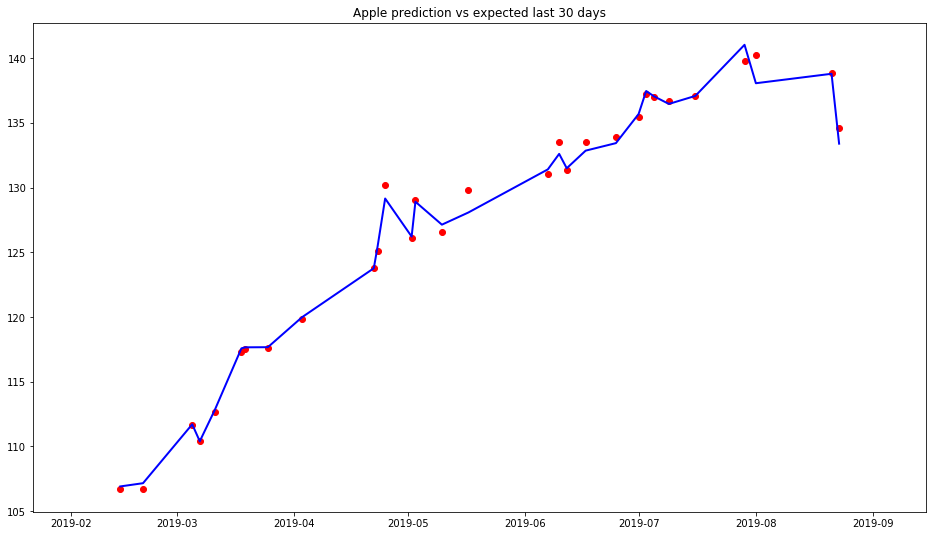

In [0]:
plt.scatter(vDataPlt_AAPL_Test["date"].tail(30), vDataPlt_AAPL_Test["prediction"].tail(30), color='red') 
plt.plot(vDataPlt_AAPL_Test["date"].tail(30), vDataPlt_AAPL_Test["real"].tail(30), color='blue', linewidth=2) 
plt.title('Apple prediction vs expected last 30 days') 

plt.show()

**RMSE Table by company**

In [0]:
vRMSE_table = pd.DataFrame({"FB": [vRMSE_FB_Train,vRMSE_FB_Test],
                   "AMZN": [vRMSE_AMZN_Train,vRMSE_AMZN_Test],
                   "GOOGL": [vRMSE_GOOGL_Train,vRMSE_GOOGL_Test],
                   "AAPL": [vRMSE_AAPL_Train,vRMSE_AAPL_Test],},index=['RMSE Train', 'RMSE Test'])

vRMSE_table

,FB,AMZN,GOOGL,AAPL
RMSE Train,0.738136,3.240660,3.060118,0.246878
RMSE Test,0.803117,3.819215,3.005737,0.253282


## KNeighbors

A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors.  Another approach uses an inverse distance weighted average of the K nearest neighbors. KNN regression uses the same distance functions as KNN classification.

**First we will evaluate in a range of 20 the best value of the hyperparameter *n_neighbors* according to RMSE.**

In [0]:
vRMSE_Values_KNeighbors = []
for K in range(20):
    K = K+1
    vKNeighborsModel = neighbors.KNeighborsRegressor(n_neighbors = K)

    vKNeighborsModel.fit(vX_Data_Train, vY_Data_Train)  
    vPrediction = vKNeighborsModel.predict(vX_Data_Test)
    vError = sqrt(metrics.mean_squared_error(vY_Data_Test,vPrediction)) 
    vRMSE_Values_KNeighbors.append(vError) 

**Lets see the results**

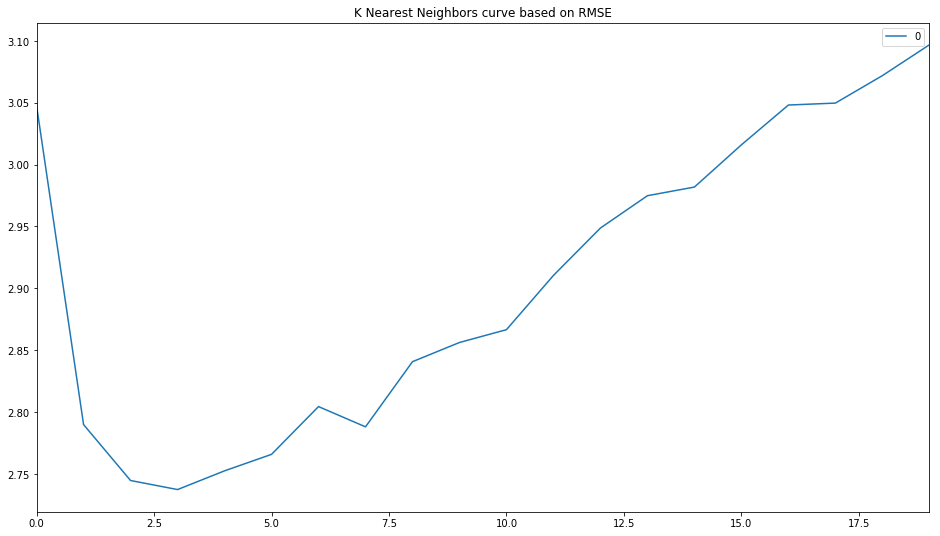

In [0]:
vCurve_KNeighbors = pd.DataFrame(vRMSE_Values_KNeighbors)
vCurve_KNeighbors.plot(title = 'K Nearest Neighbors curve based on RMSE')

**As you can see the best K according with the minor loss is 3, so now we will run the algorithm with n_neighbors = 3, to calculate the model score and loss.**

In [0]:
vKnn = KNeighborsRegressor(n_neighbors = 3)
vKnn.fit(vX_Data_Train, vY_Data_Train)

#Score
vKnn_Train_score = vKnn.score(vX_Data_Train, vY_Data_Train) #gives a score between 0 and 1, where 1 indicates that the algorithm learned perfectly and 0 that did not learn anything.
vKnn_Test_score = vKnn.score(vX_Data_Test, vY_Data_Test)

yPredictionTrain = vKnn.predict(vX_Data_Train)
yPredictionTest = vKnn.predict(vX_Data_Test)

#RMSE
vRMSE_Knn_Train = sqrt(metrics.mean_squared_error(yPredictionTrain, vY_Data_Train))
vRMSE_Knn_Test = sqrt(metrics.mean_squared_error(yPredictionTest, vY_Data_Test))


## Random Forest

Random Forest is a flexible, easy to use machine learning algorithm that produces great results most of the time with minimum time spent on hyper-parameter tuning. 

Random Forest is an ensemble machine learning technique capable of performing regression tasks using multiple decision trees and a statistical technique called bagging. Bagging along with boosting are two of the most popular ensemble techniques which aim to tackle high variance and high bias. A RF instead of just averaging the prediction of trees it uses two key concepts that give it the name random:

1. Random sampling of training observations when building trees
2. Random subsets of features for splitting nodes


In other words, Random forest builds multiple decision trees and merge their predictions together to get a more accurate and stable prediction rather than relying on individual decision trees.

**As we did with K Nearest Neighbors, first we will evaluate in a range of 20 the best value of the hyperparameter; in this case *max_deph* according to RMSE.**

In [0]:
vRMSE_Values_RandomForest = []
for K in range(20):
    K = K+1
    vRandomForestModel =RandomForestRegressor(max_depth=K,random_state=vRandomSeed)

    vRandomForestModel.fit(vX_Data_Train, vY_Data_Train)  
    vPrediction = vRandomForestModel.predict(vX_Data_Test)
    vError = sqrt(metrics.mean_squared_error(vY_Data_Test,vPrediction)) 
    vRMSE_Values_RandomForest.append(vError)   

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default valu

**Lets see the results**

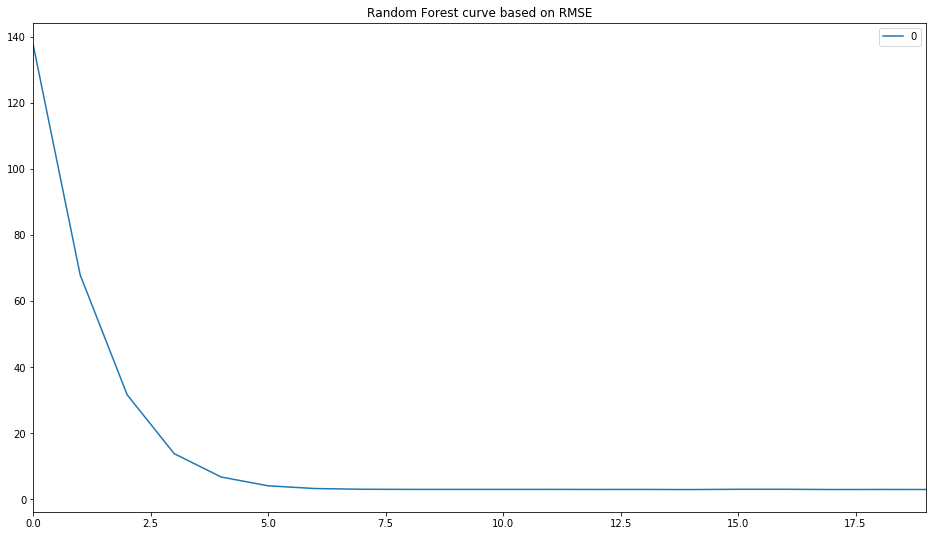

In [0]:
vCurve_RandomForest = pd.DataFrame(vRMSE_Values_RandomForest)
vCurve_RandomForest.plot(title = 'Random Forest curve based on RMSE')

In [0]:
print(vRandomForestModel.feature_importances_)

[4.581154e-07 1.491888e-02 3.952807e-01 5.897878e-01 1.281239e-06 4.026946e-06 6.836148e-06]


**As you can see the best *max_depth* according with the minor loss is 6 or more, so now we will run the algorithm with max_depth = 6, to calculate the model score and loss**

In [0]:
vRandomForest = RandomForestRegressor(max_depth=6,random_state=vRandomSeed)
vRandomForest.fit(vX_Data_Train, vY_Data_Train)

#Score
vRF_Train_score = vRandomForest.score(vX_Data_Train, vY_Data_Train) #gives a score between 0 and 1, where 1 indicates that the algorithm learned perfectly and 0 that did not learn anything.
vRF_Test_score = vRandomForest.score(vX_Data_Test, vY_Data_Test)

yPredictionTrain = vRandomForest.predict(vX_Data_Train)
yPredictionTest = vRandomForest.predict(vX_Data_Test)

#RMSE
vRMSE_RF_Train = sqrt(metrics.mean_squared_error(yPredictionTrain, vY_Data_Train))
vRMSE_RF_Test = sqrt(metrics.mean_squared_error(yPredictionTest, vY_Data_Test))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## RNN

### Neural network model for the regression problem.

We can create Keras models and evaluate them with scikit-learn by using handy wrapper objects provided by the Keras library. This is desirable, because scikit-learn excels at evaluating models and will allow us to use powerful data preparation and model evaluation schemes with very few lines of code.

The Keras wrappers require a function as an argument. This function that we must define is responsible for creating the neural network model to be evaluated.

Below we define the function to create the baseline model to be evaluated. It is a simple model that has a single fully connected hidden layer with the same number of neurons as input attributes (7). The network uses good practices such as the rectifier activation function for the hidden layer. No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transform.

The efficient ADAM optimization algorithm is used and a mean squared error loss function is optimized. This will be the same metric that we will use to evaluate the performance of the model. 

In [0]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

The final step is to evaluate this model.

In [0]:
model = baseline_model()
model.fit(vX_Data_Train, vY_Data_Train, epochs=500, batch_size=100, verbose=0)

vRMSE_RNN_Train = sqrt(model.evaluate(vX_Data_Train, vY_Data_Train))
print("\n RMSE loss Train:", vRMSE_RNN_Train)
vRMSE_RNN_Test = sqrt(model.evaluate(vX_Data_Test, vY_Data_Test))
print("\n RMSE loss Testing:", vRMSE_RNN_Test)

20585/20585 [==============================] - 0s 18us/step

 RMSE loss Train: 1.9517480873601871
8823/8823 [==============================] - 0s 16us/step

 RMSE loss Testing: 2.1426608246028818


Running this code gives us an estimate of the model’s performance, the result reports the mean squared error.

In [0]:
yPredictionTrain = model.predict(vX_Data_Train)
yPredictionTest = model.predict(vX_Data_Test)

#Score
vRNN_Train_score = metrics.r2_score(yPredictionTrain, vY_Data_Train)
vRNN_Test_score = metrics.r2_score(yPredictionTest, vY_Data_Test)



# Conclusions

> ## 1. The number of features
The number of features played an important role in the prediction, a way to improve this model or make it a more accurate prediction on a daily basis in the stock market would be adding new features. An example of a feature that could be added may be the current value of raw materials, this may change from day to day affect the close value.

> ## 2. Feature correlation
When we made the heat maps we observed a very strong correlation between high, low, open and close, which made our model have a very accurate prediction, this is very good for the practice but in a daily basis this means that there is overfitting related to strongly correlated features.

> ## 3. Best model for the problem
The fact that we handle so few features in this problem makes Linear Regression the best model to predict, however, if we expand the problem to more features it is possible that we would have obtained better results with Random Forest or RNN.

> As a conclusion of this specific problem we could say that basically If you have a linear correlated dataset you need a simple model like linear regression because even the best CNN will give you a poor result.

>> ### Comparison Table with the models score and loss RMSE
In this table we can see the score of the model (with Train and Test) and loss associated with each one:
* **Score** wich gives a score between 0 and 1, where 1 indicates that the algorithm learned perfectly and 0 that did not learn anything.
* **RMSE** is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. RMSE is an absolute measure of fit, as the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [0]:
vRMSE_table = pd.DataFrame({"Linear Regression": [vLR_Train_score, vLR_Test_score, vRMSE_LR_Train,vRMSE_LR_Test],
                   "KNeighbors(3)": [vKnn_Train_score,vKnn_Test_score,vRMSE_Knn_Train,vRMSE_Knn_Test],
                   "Random Forest(6)": [vRF_Train_score, vRF_Test_score, vRMSE_RF_Train,vRMSE_RF_Test],
                   "RNN": [vRNN_Train_score, vscore_RNN_Test,vRMSE_RNN_Train,vRMSE_RNN_Test]},
                   index=['Train score', 'Test score', 'RMSE Train', 'RMSE Test'])


vRMSE_table

,Linear Regression,KNeighbors(3),Random Forest(6),RNN
Train score,0.999961,0.999959,0.999880,0.999955
Test score,0.999951,0.999907,0.999804,0.999939
RMSE Train,1.822460,1.861314,3.192944,1.951748
RMSE Test,1.986892,2.744626,3.977511,2.142661


>>> **Linear Regression has the best prediction indicators:**
As we mentioned earlier, comparing the results of the models associated loss RMSE and score, we can see that the best prediction result is with Linear Regression.

>>> Linear Regression is a fast and easy to model and is particularly useful when the relationship to be modeled is not extremely complex and if you don’t have a lot of data. Also, is very intuitive to understand and interpret.

> ## 4. Problem approach
The approach that we defined for this problem was based on the *date = today* in which we want to make the prediction of the *y = close*, but perhaps a more realistic approach in which where we predict *y = close* depend on the next day (*date = today + 1*), the problem could give us others results.


#Next Steps



*   Get new features to the problem like: usd and eur exchange rate, prime rate, pretrol price, etc. Some on them maybe can show some interesting results.
*   Use the Features of one company as variables to other one. To focus for example in Google, and use the Facebook (close,high,low,etc) of the day before to predict Google today.

